In [1]:
import numpy as np
import nrrd

In [2]:
import matplotlib.pyplot as plt

In [6]:
import sys
sys.path.append('../../_EXPERIMENTS')
import os

(512, 512, 384)


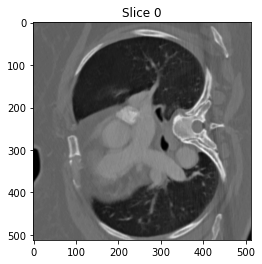

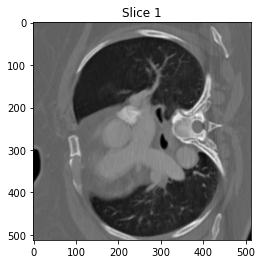

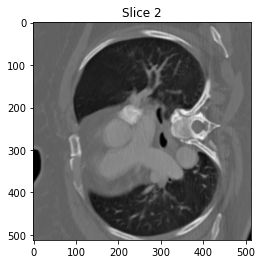

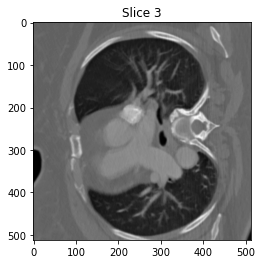

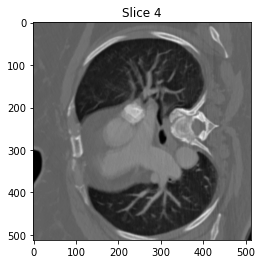

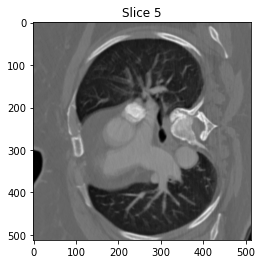

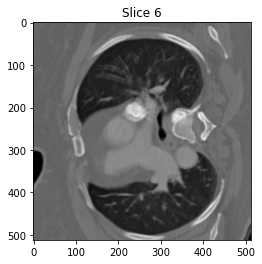

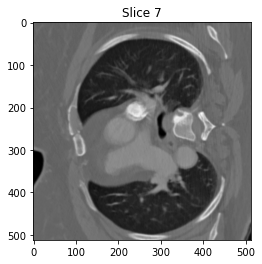

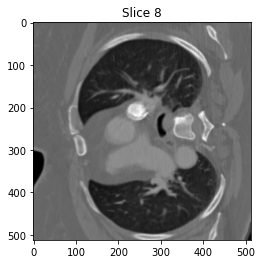

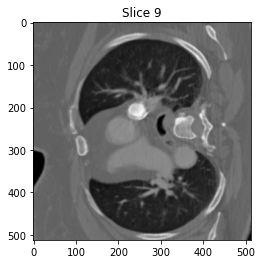

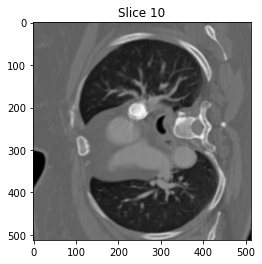

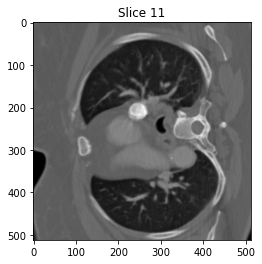

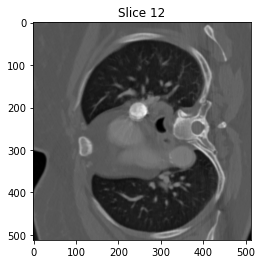

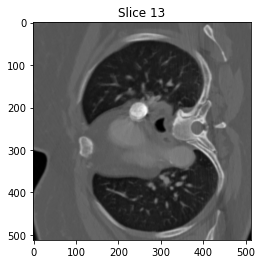

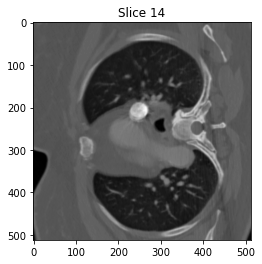

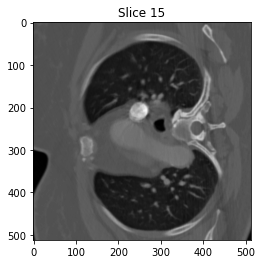

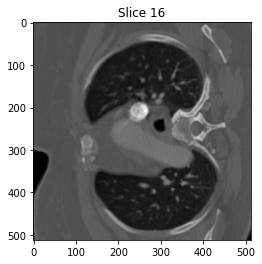

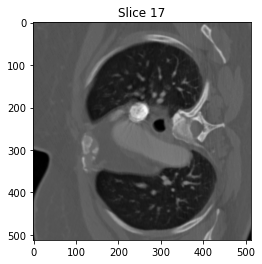

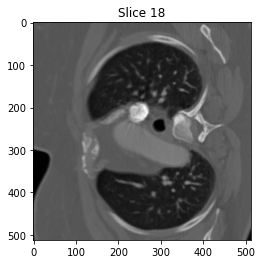

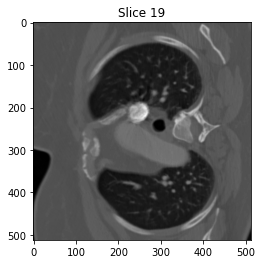

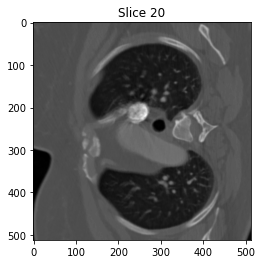

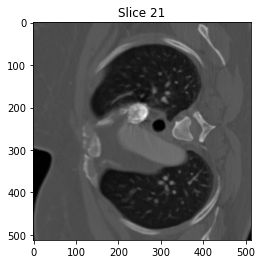

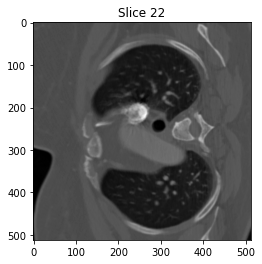

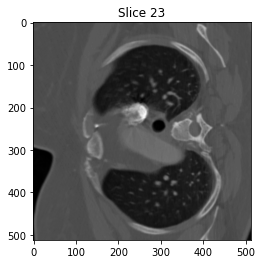

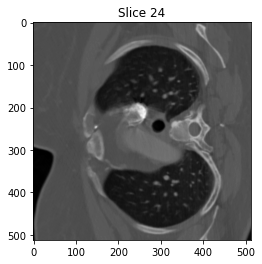

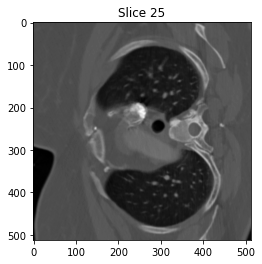

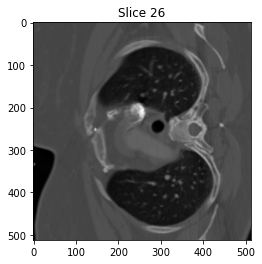

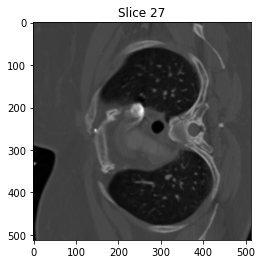

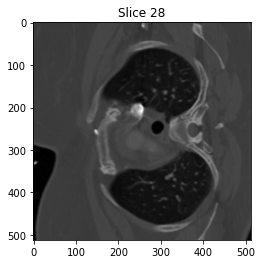

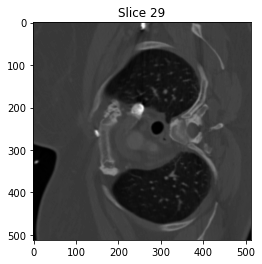

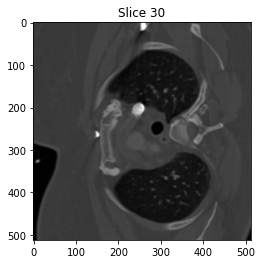

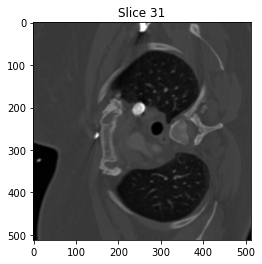

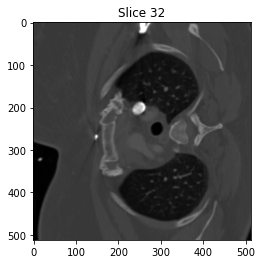

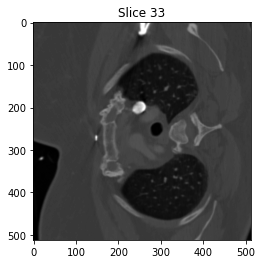

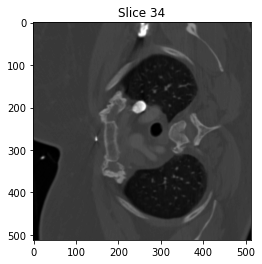

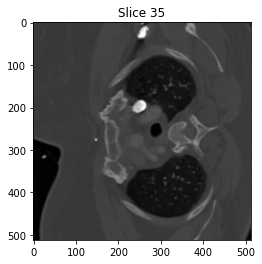

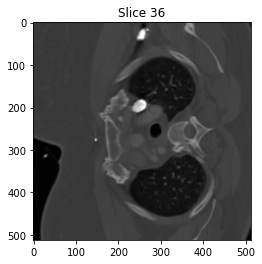

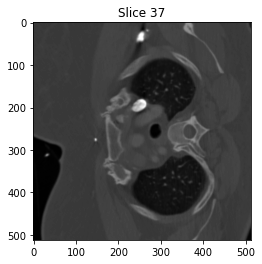

KeyboardInterrupt: 

In [4]:
data, header = nrrd.read('PaddedImagesESUS/Image_0.nrrd')

# Check the dimensions of the loaded image
print(data.shape)  

# View slices along the Z-axis (third dimension)
z_slices = range(data.shape[2])
for z in z_slices:
    plt.imshow(data[:, :, z], cmap='gray')
    plt.title(f'Slice {z}')
    plt.show()

In [11]:
# Define input and output paths and filenames
input_path = "/home/dhruvjignesh.shah001/CACTAS-AI/_EXPERIMENTS/3D UNET/ChunksESUS"
output_filename = "combined.nrrd"
output_path = "CombinedChunks"

# Define the size of the input chunks
chunk_size = (128, 128, 128)

# Calculate the number of chunks in each dimension
num_chunks_x = 4
num_chunks_y = 4
num_chunks_z = 3

# Define the size of the output image
output_size = (num_chunks_x * chunk_size[0], num_chunks_y * chunk_size[1], num_chunks_z*chunk_size[2])

# Create an empty array to hold the combined image
combined = np.empty(output_size)

# Combine the smaller chunks along axis 0
for i in range(num_chunks_x):
    for j in range(num_chunks_y):
        for k in range(num_chunks_z):
            # Load the chunk
            chunk_filename = os.path.join(input_path, f"output_chunk_{i*num_chunks_y*num_chunks_z + j*num_chunks_z + k}.nrrd")
            chunk, _ = nrrd.read(chunk_filename)

            # Determine the slice of the output array to insert the chunk into
            x_start = i * chunk_size[0]
            x_end = (i + 1) * chunk_size[0]
            y_start = j * chunk_size[1]
            y_end = (j + 1) * chunk_size[1]
            z_start = k * chunk_size[2]
            z_end = (k + 1) * chunk_size[2]

            # Insert the chunk into the output array
            combined[x_start:x_end, y_start:y_end, z_start:z_end] = chunk

# Save the combined image as an nrrd file
if not os.path.exists(output_path):
    os.makedirs(output_path)
output_path = os.path.join(output_path, output_filename)
nrrd.write(output_path, combined)


(512, 512, 384)


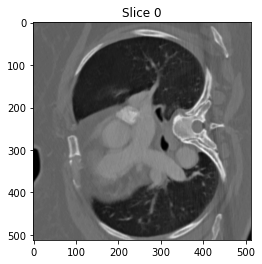

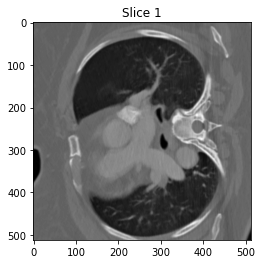

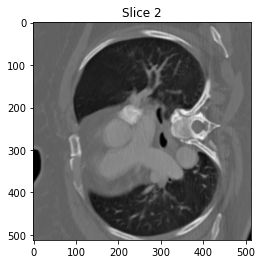

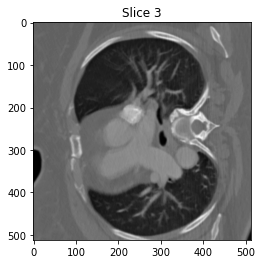

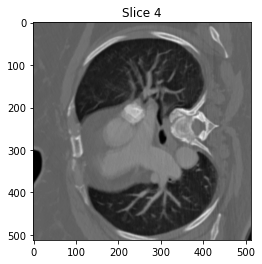

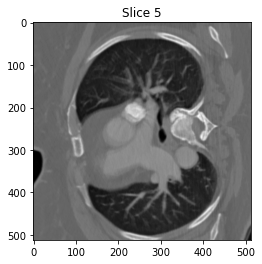

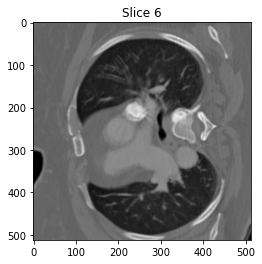

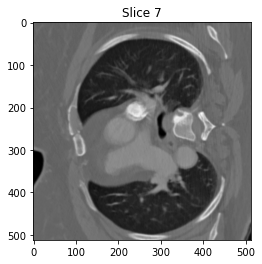

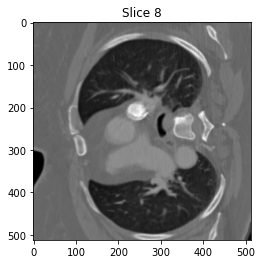

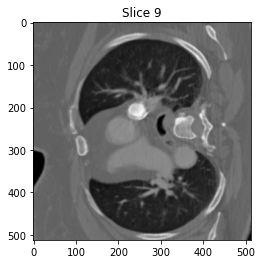

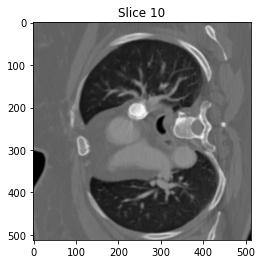

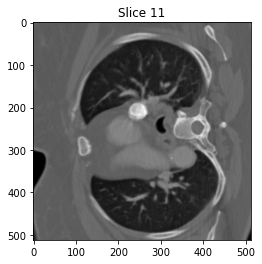

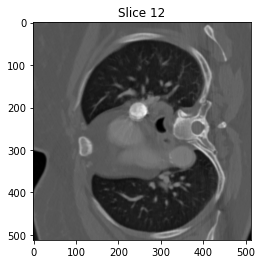

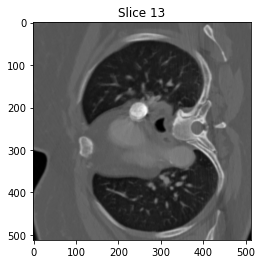

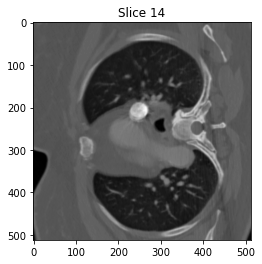

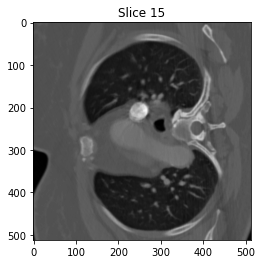

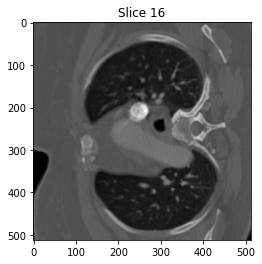

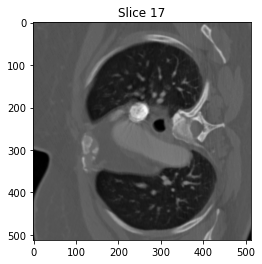

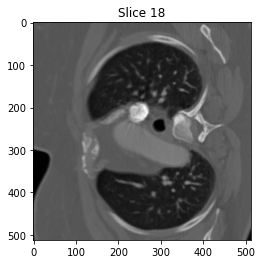

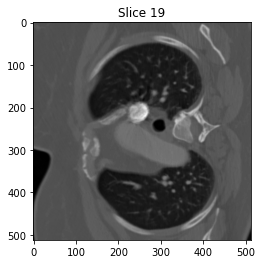

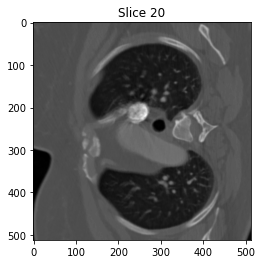

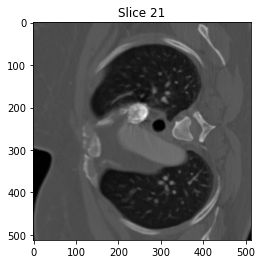

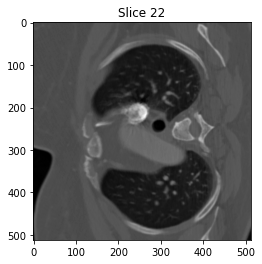

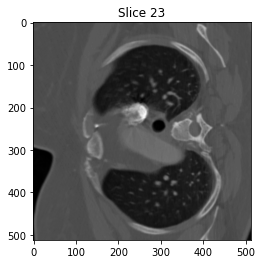

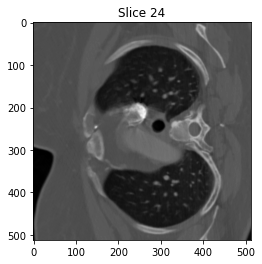

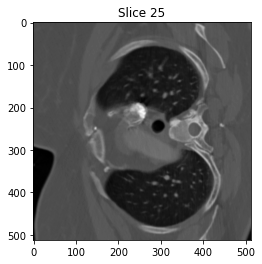

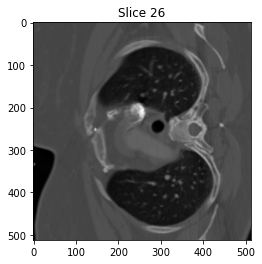

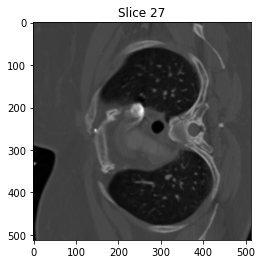

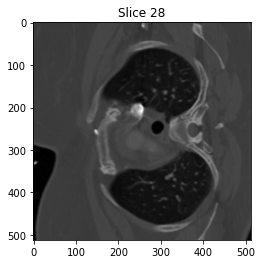

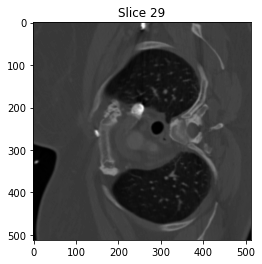

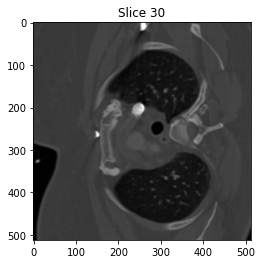

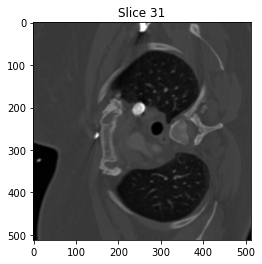

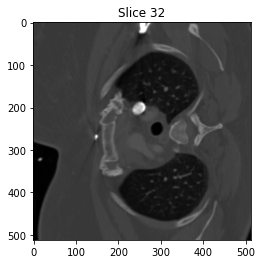

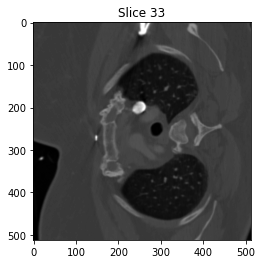

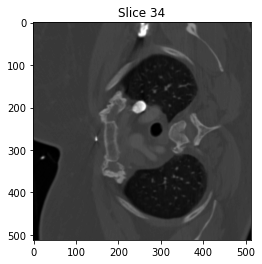

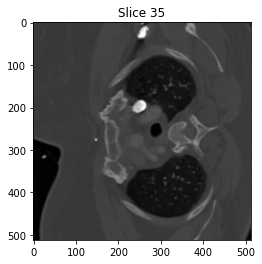

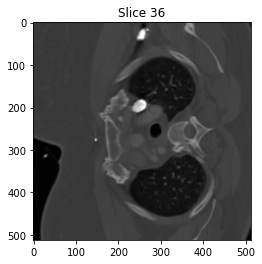

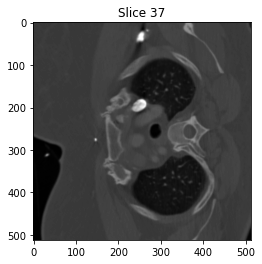

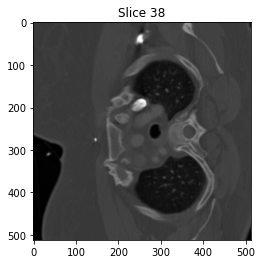

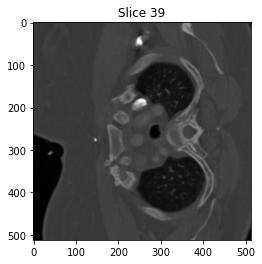

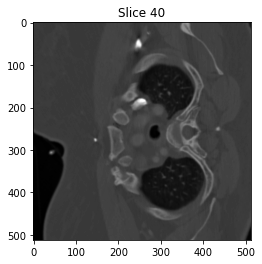

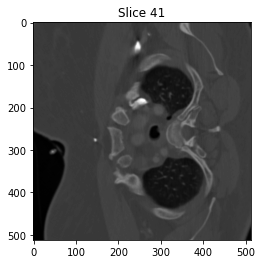

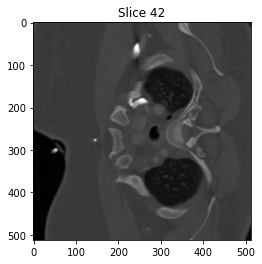

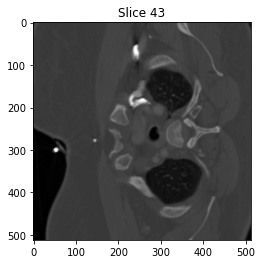

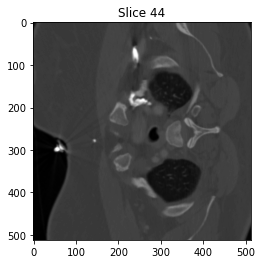

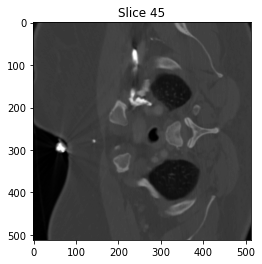

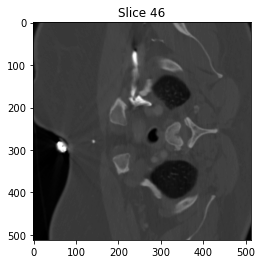

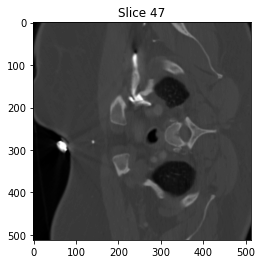

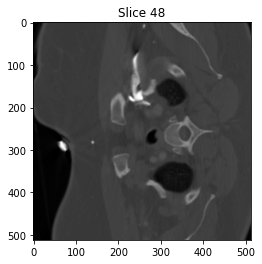

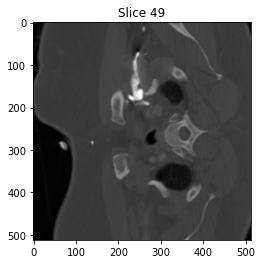

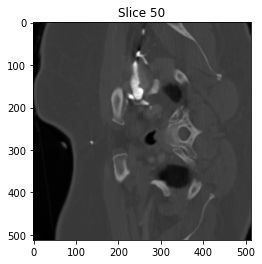

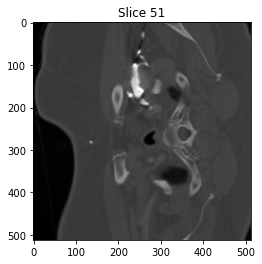

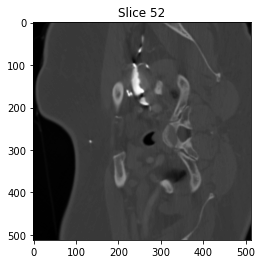

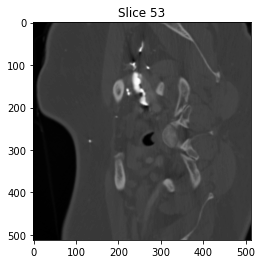

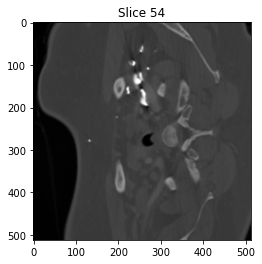

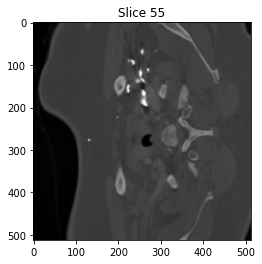

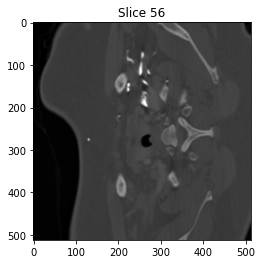

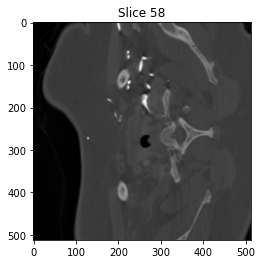

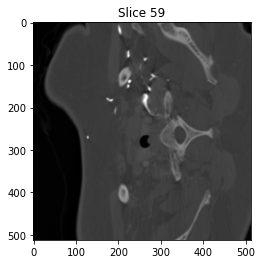

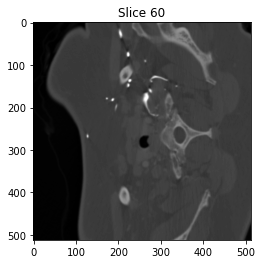

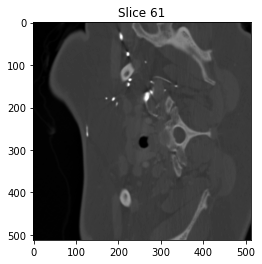

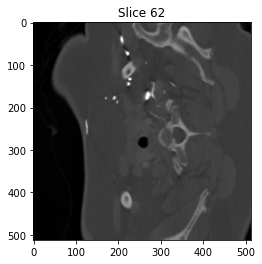

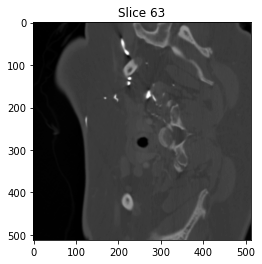

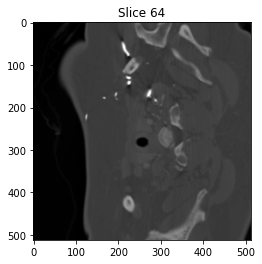

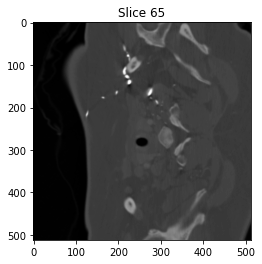

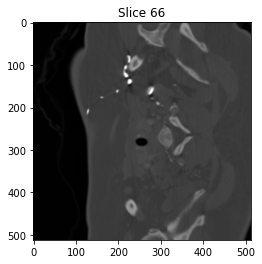

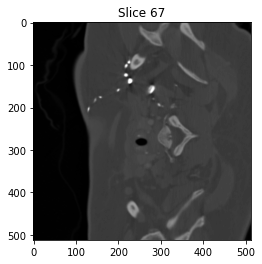

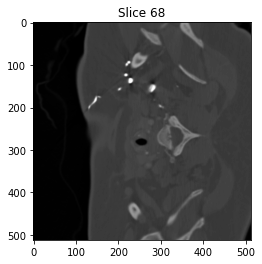

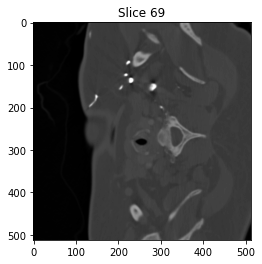

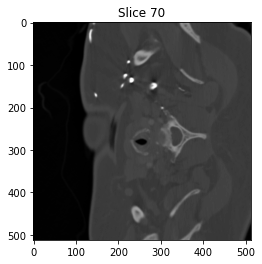

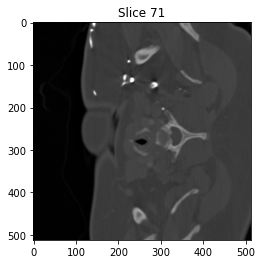

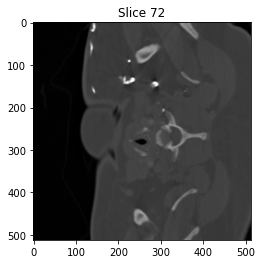

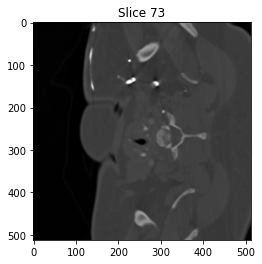

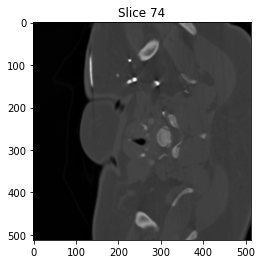

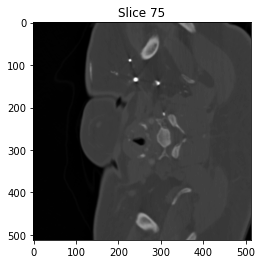

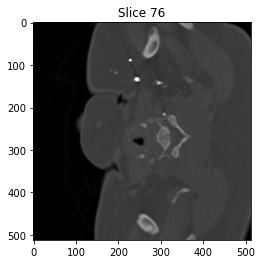

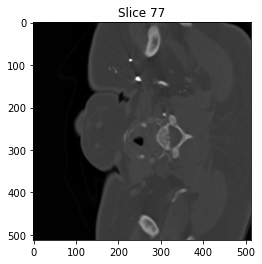

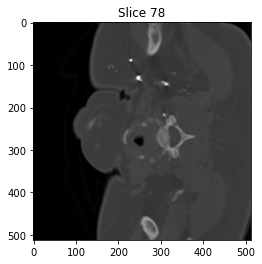

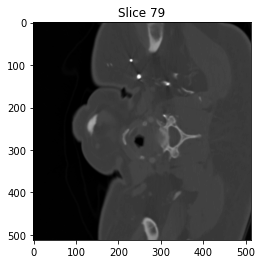

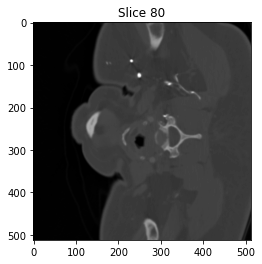

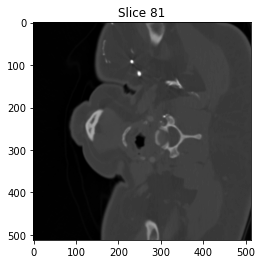

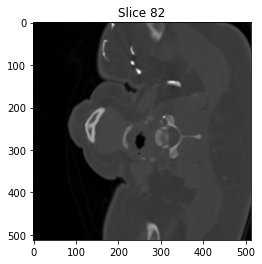

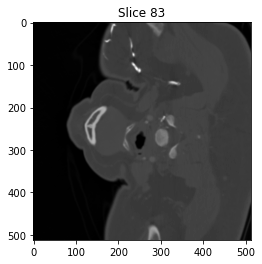

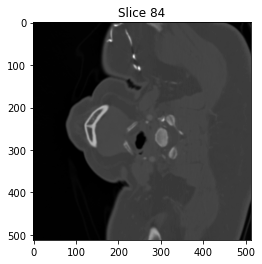

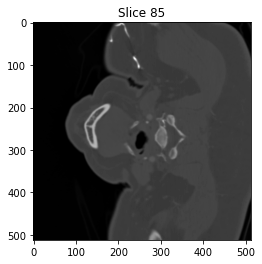

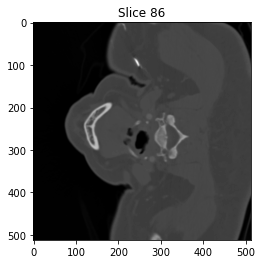

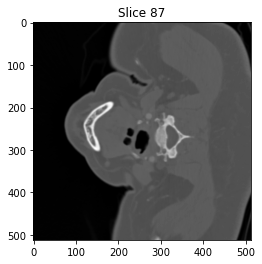

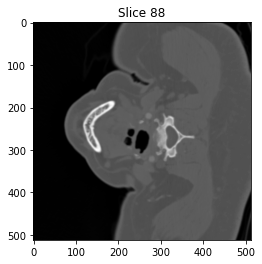

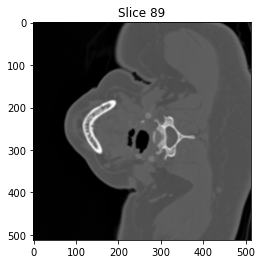

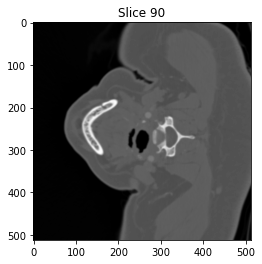

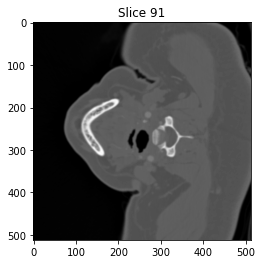

KeyboardInterrupt: 

In [12]:
data, header = nrrd.read('CombinedChunks/combined.nrrd')

# Check the dimensions of the loaded image
print(data.shape)  

# View slices along the Z-axis (third dimension)
z_slices = range(data.shape[2])
for z in z_slices:
    plt.imshow(data[:, :, z], cmap='gray')
    plt.title(f'Slice {z}')
    plt.show()